In [23]:
# pyright: reportMissingImports=false
from pathlib import Path
import pandas as pd

NB_DIR = Path(__file__).resolve().parent if '__file__' in globals() else Path.cwd()
COMBINED_DIR = (NB_DIR / "../results/combined").resolve()

COMBINED_FILENAME = "accel_dr-softmin_plr-negmean_30k.parquet"  # e.g., "my_group.parquet"

if not COMBINED_DIR.exists():
    raise FileNotFoundError(f"Combined directory not found: {COMBINED_DIR}")

if COMBINED_FILENAME is None:
    candidates = sorted(COMBINED_DIR.glob("*.parquet"), key=lambda p: p.stat().st_mtime, reverse=True)
    if not candidates:
        raise FileNotFoundError(f"No .parquet files in {COMBINED_DIR}")
    combined_path = candidates[0]
else:
    combined_path = (COMBINED_DIR / COMBINED_FILENAME).resolve()
    if not combined_path.exists():
        raise FileNotFoundError(f"Combined file not found: {combined_path}")

print(f"Reading: {combined_path}")
combined = pd.read_parquet(combined_path)
combined.shape

Reading: /home/callum/projects/jaxued/results/combined/accel_dr-softmin_plr-negmean_30k.parquet


(30000, 10)

In [24]:
# Preview
combined.head(20)

,run_name,seed,attempt,level_index,level_name,cum_reward,episode_length,checkpoint,source_npz,algo
0,plr_accel_v1_30000a,0,0,0,SixteenRooms,0.5896,114,118,/home/callum/projects/jaxued/results/plr_accel...,ACCEL
1,plr_accel_v1_30000a,0,0,1,SixteenRooms2,0.0000,250,118,/home/callum/projects/jaxued/results/plr_accel...,ACCEL
2,plr_accel_v1_30000a,0,0,2,Labyrinth,0.0000,250,118,/home/callum/projects/jaxued/results/plr_accel...,ACCEL
3,plr_accel_v1_30000a,0,0,3,LabyrinthFlipped,0.4564,151,118,/home/callum/projects/jaxued/results/plr_accel...,ACCEL
4,plr_accel_v1_30000a,0,0,4,Labyrinth2,0.0000,250,118,/home/callum/projects/jaxued/results/plr_accel...,ACCEL
5,plr_accel_v1_30000a,0,0,5,StandardMaze,0.0000,250,118,/home/callum/projects/jaxued/results/plr_accel...,ACCEL
6,plr_accel_v1_30000a,0,0,6,StandardMaze2,0.0000,250,118,/home/callum/projects/jaxued/results/plr_accel...,ACCEL
7,plr_accel_v1_30000a,0,0,7,StandardMaze3,0.4024,166,118,/home/callum/projects/jaxued/results/plr_accel...,ACCEL
8,plr_accel_v1_30000a,0,1,0,SixteenRooms,0.3340,185,118,/home/callum/projects/jaxued/results/plr_accel...,ACCEL
9,plr_accel_v1_30000a,0,1,1,SixteenRooms2,0.0000,250,118,/home/callum/projects/jaxued/results/plr_accel...,ACCEL


In [25]:
# Simple summary
summary = (
    combined
    .groupby(["run_name", "seed"])
    .agg(n_rows=("run_name", "size"), mean_return=("cum_reward", "mean"))
    .reset_index()
)
summary.sort_values(["run_name", "seed"]).head(50)

,run_name,seed,n_rows,mean_return
0,accel_eval250_seed1_30000a,1,2000,0.101967
1,accel_eval250_seed2_30000a,2,2000,0.196726
2,accel_eval250_seed3_30000a,3,2000,0.256636
3,accel_eval250_seed4_30000a,4,2000,0.189923
4,dr_softmin_eval250_seed1_30000a,1,2000,0.443635
5,dr_softmin_eval250_seed2_30000a,2,2000,0.459842
6,dr_softmin_eval250_seed3_30000a,3,2000,0.365071
7,dr_softmin_eval250_seed4_30000a,4,2000,0.324098
8,dr_softmin_weighting_v2_normalised_30000a,0,2000,0.359089
9,plr_accel_v1_30000a,0,2000,0.243668


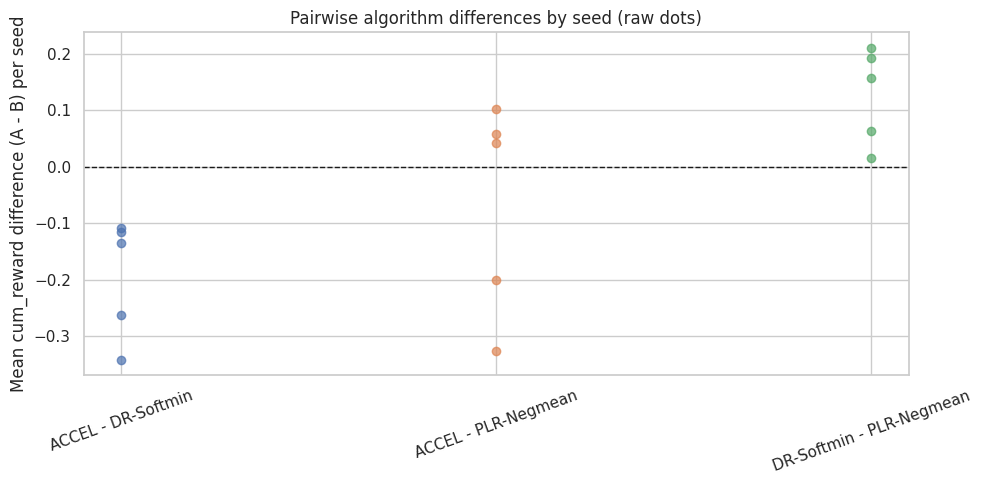

,seed,diff,pair
0,0,-0.115421,ACCEL - DR-Softmin
1,1,-0.341669,ACCEL - DR-Softmin
2,2,-0.263116,ACCEL - DR-Softmin
3,3,-0.108435,ACCEL - DR-Softmin
4,4,-0.134174,ACCEL - DR-Softmin
5,0,0.042143,ACCEL - PLR-Negmean
6,1,-0.325786,ACCEL - PLR-Negmean
7,2,-0.200433,ACCEL - PLR-Negmean
8,3,0.102139,ACCEL - PLR-Negmean
9,4,0.057784,ACCEL - PLR-Negmean


In [32]:
# Pairwise differences per seed as dots
seed_algo = combined.groupby(["seed", "algo"])["cum_reward"].mean().reset_index()

pivot = seed_algo.pivot(index="seed", columns="algo", values="cum_reward").dropna()
algos = list(pivot.columns)
pairs = list(itertools.combinations(algos, 2))

rows = []
for a, b in pairs:
    d = (pivot[a] - pivot[b]).reset_index()
    d.columns = ["seed", "diff"]
    d["pair"] = f"{a} - {b}"
    rows.append(d)

pairwise = pd.concat(rows, ignore_index=True)

fig, ax = plt.subplots(figsize=(10, 5))
for i, (pair, grp) in enumerate(pairwise.groupby("pair")):
    x = [i] * len(grp)
    ax.scatter(x, grp["diff"], alpha=0.7, label=pair)

ax.axhline(0.0, color="k", linestyle="--", linewidth=1)
ax.set_xticks(range(len(pairwise["pair"].unique())))
ax.set_xticklabels(pairwise["pair"].unique(), rotation=20)
ax.set_ylabel("Mean cum_reward difference (A - B) per seed")
ax.set_title("Pairwise algorithm differences by seed (raw dots)")
plt.tight_layout()
plt.show()

pairwise.head(20)

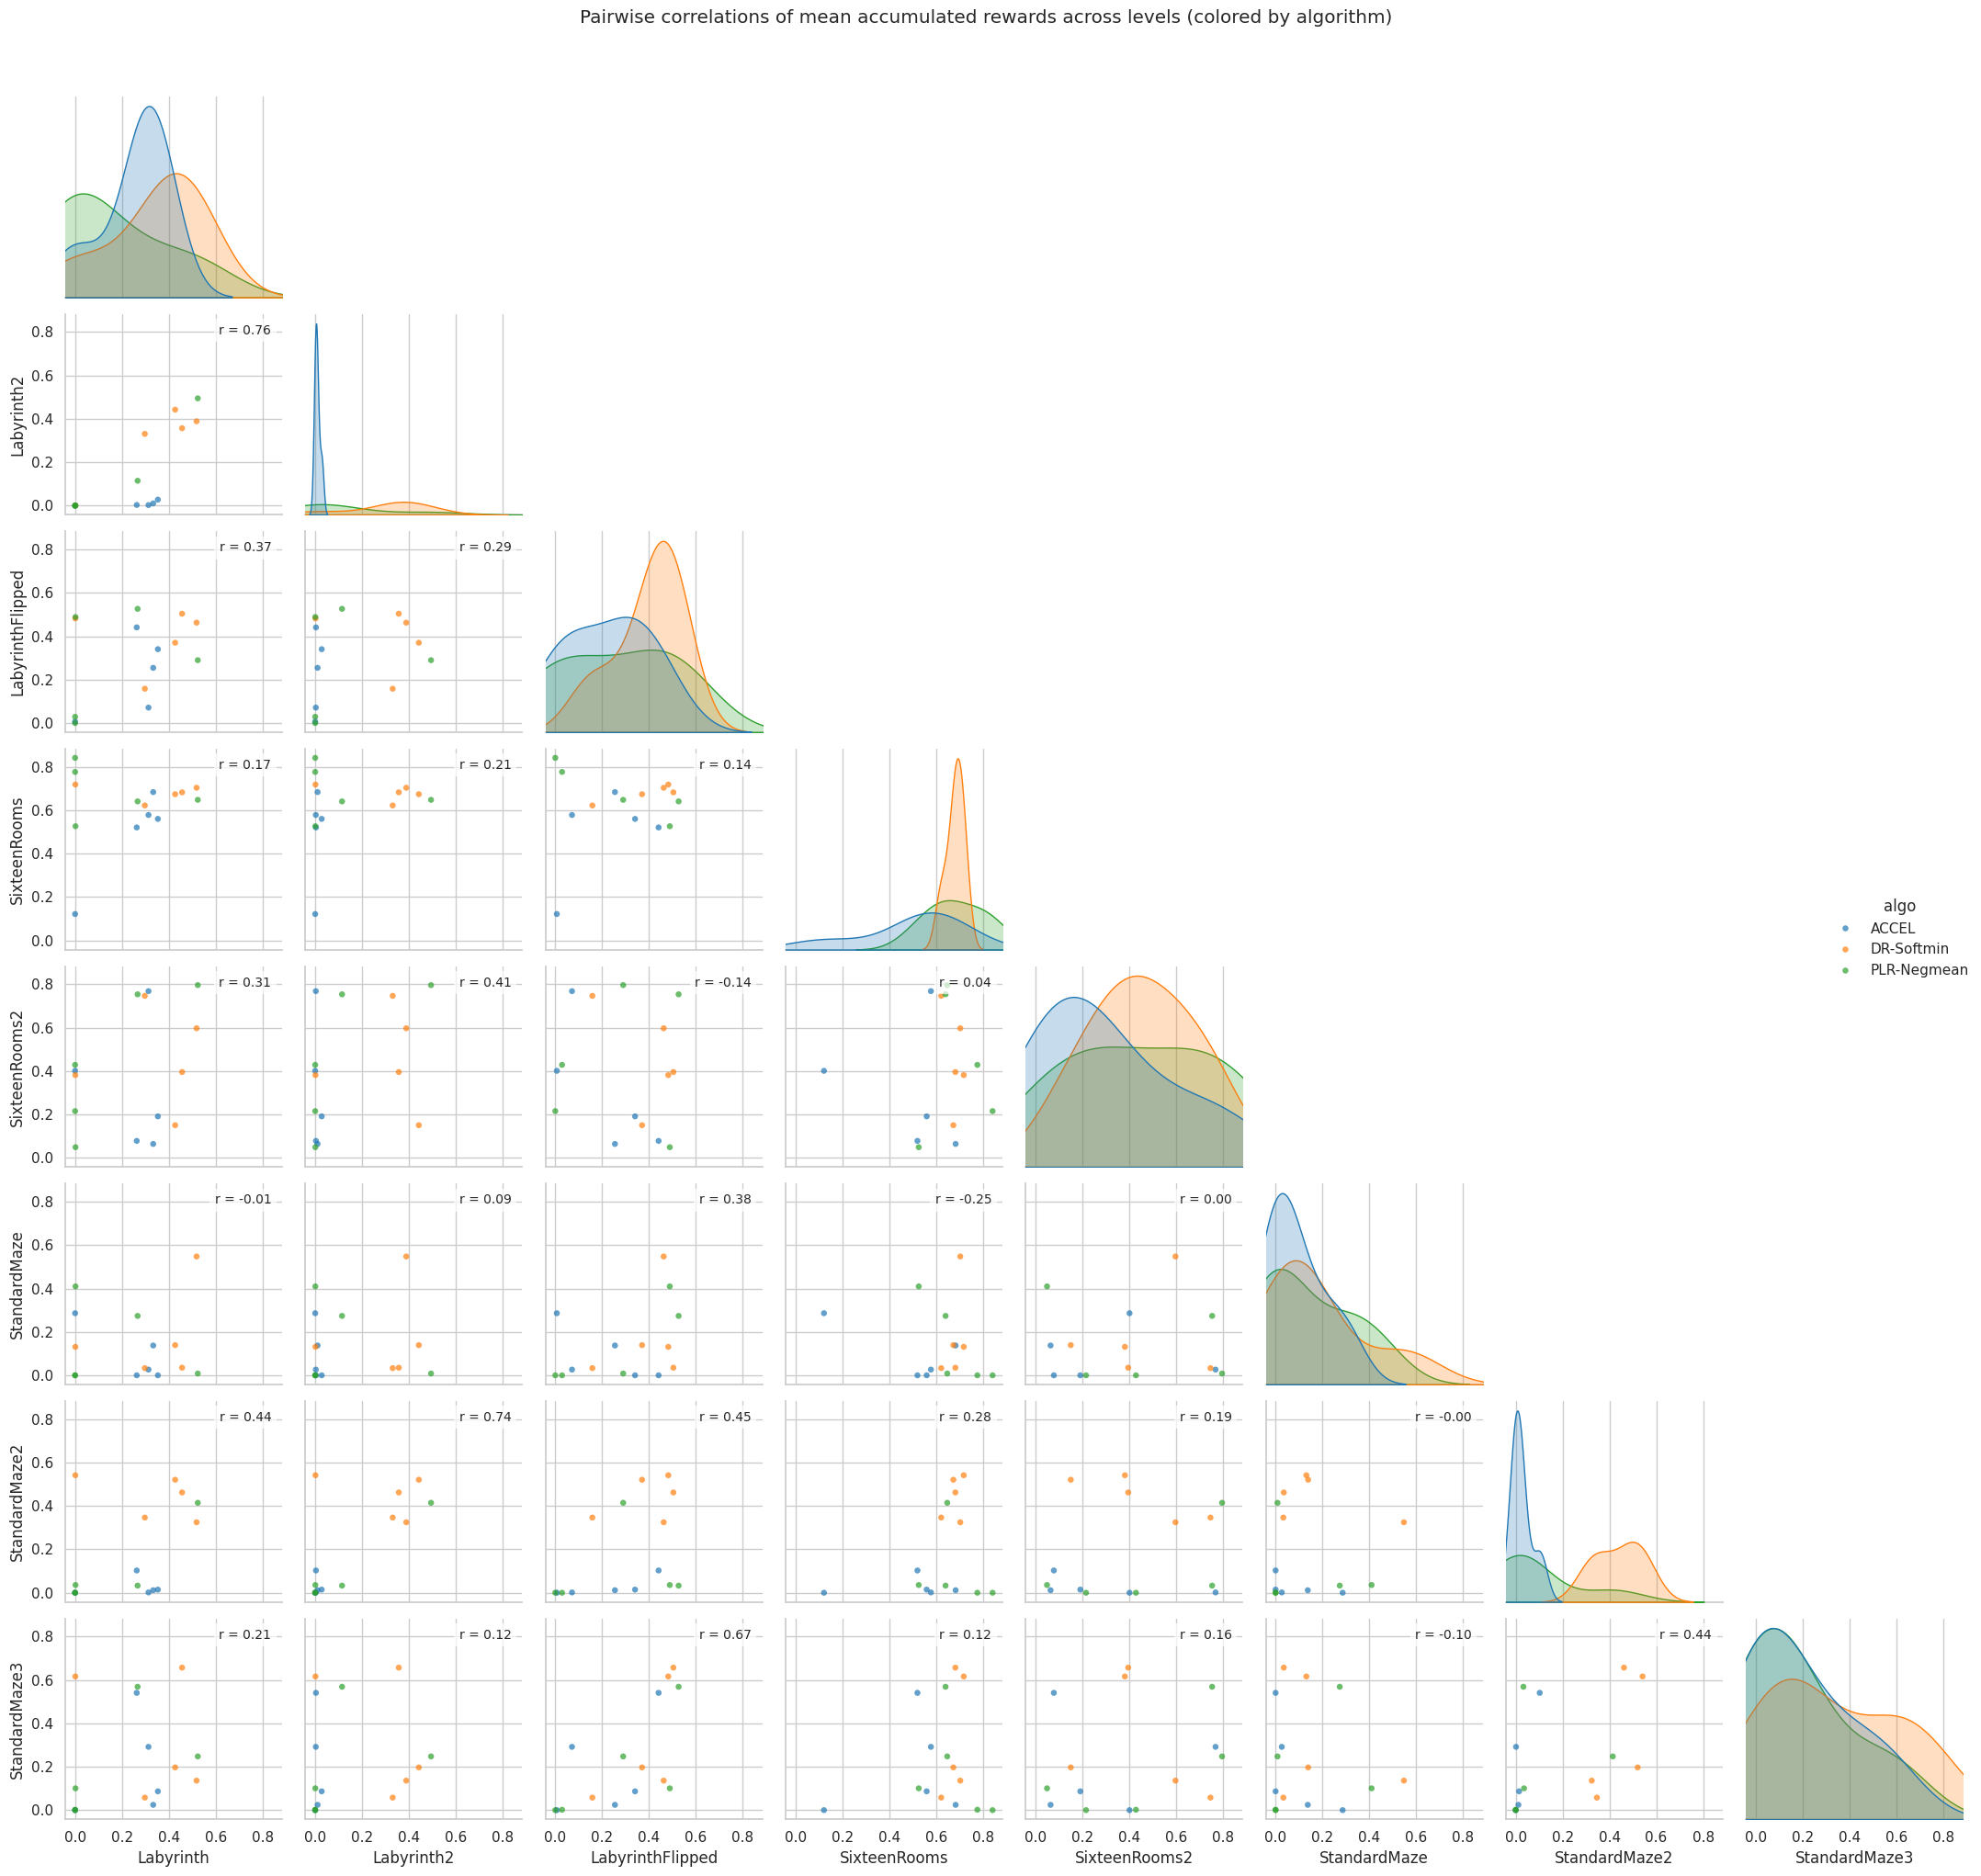

In [41]:
# pyright: reportMissingImports=false
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Mean across attempts per (algo, seed, level_name)
level_means = (
    combined
    .groupby(["algo", "seed", "level_name"])["cum_reward"]
    .mean()
    .reset_index()
)

# Wide format: one row per (algo, seed), columns are level_name means
level_wide = (
    level_means
    .pivot_table(index=["algo", "seed"], columns="level_name", values="cum_reward")
    .reset_index()
)

level_cols = [c for c in level_wide.columns if c not in ("algo", "seed")]
if len(level_cols) < 2:
    raise ValueError(f"Need at least 2 levels; found {len(level_cols)}")

sns.set(style="whitegrid")
g = sns.pairplot(
    level_wide,
    vars=level_cols,
    hue="algo",
    palette="tab10",
    corner=True,
    plot_kws={"alpha": 0.7, "s": 22, "edgecolor": "none"},
    diag_kind="kde"
)
g.fig.suptitle("Pairwise correlations of mean accumulated rewards across levels (colored by algorithm)", y=1.02)
# pyright: reportMissingImports=false
import numpy as np

# Compute global data bounds across all level columns
vals = level_wide[level_cols].to_numpy(dtype=float)
vmin = np.nanmin(vals)
vmax = np.nanmax(vals)
if not np.isfinite(vmin) or not np.isfinite(vmax):
    vmin, vmax = 0.0, 1.0
if vmin == vmax:
    eps = 1e-6
    vmin, vmax = vmin - eps, vmax + eps

margin = 0.05 * (vmax - vmin)
lo, hi = vmin - margin, vmax + margin

# Apply limits to all subplots
for i, row in enumerate(g.axes):
    for j, ax in enumerate(row):
        if ax is None:
            continue
        if i == j:
            ax.set_xlim(lo, hi)       # diagonal: x only
        else:
            ax.set_xlim(lo, hi)
            ax.set_ylim(lo, hi)

# Annotate each off-diagonal subplot with Pearson r
import numpy as np

for i, xi in enumerate(level_cols):
    for j, yi in enumerate(level_cols):
        # skip diagonal and any missing axes (e.g., when corner=True)
        if i == j:
            continue
        ax = g.axes[i, j] if hasattr(g, "axes") else None
        if ax is None:
            continue
        # compute r on available points
        sub = level_wide[[xi, yi]].dropna()
        if len(sub) < 2:
            r = np.nan
        else:
            r = sub.corr(method="pearson").iloc[0, 1]
        ax.text(
            0.95, 0.95, f"r = {r:.2f}",
            transform=ax.transAxes, ha="right", va="top",
            fontsize=10,
            bbox=dict(facecolor="white", edgecolor="none", alpha=0.7)
        )

plt.tight_layout()
plt.show()